### Importation des packages

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import pytesseract
from pytesseract import Output
import os
import pandas as pd
import re
from pathlib import Path

Liens intéressants :  
https://www.analyticsvidhya.com/blog/2021/06/optical-character-recognitionocr-with-tesseract-opencv-and-python/  
https://datacorner.fr/tesseract-adv/

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\INTERNET_DIGITAL\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

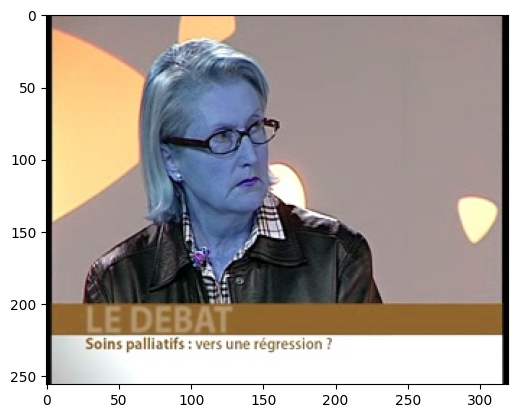

''

In [44]:
img_test = cv2.imread('data\images\image816.jpg')
plt.imshow(img_test)
plt.show()
text = pytesseract.image_to_string(img_test, lang='fra')
text

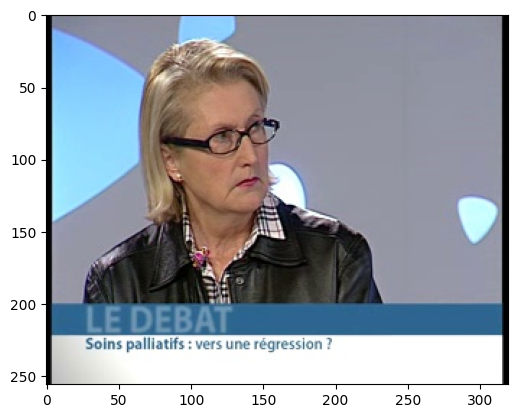

''

In [43]:
plt.imshow(img_test[:,:,::-1])
plt.show()
text = pytesseract.image_to_string(img_test[:,:,::-1], lang='fra')
text

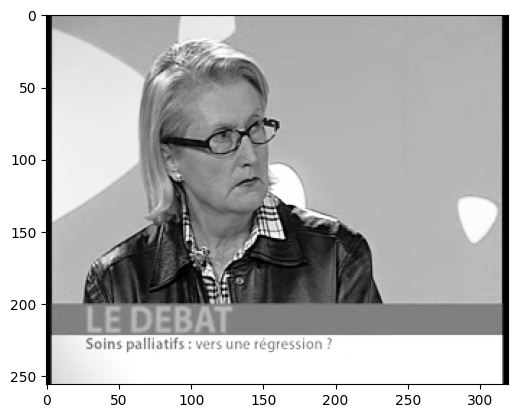

''

In [45]:
img_test_grey = cv2.cvtColor(img_test, cv2.COLOR_RGB2GRAY)
plt.imshow(img_test_grey, cmap = 'Greys_r')
plt.show()
text = pytesseract.image_to_string(img_test_grey, lang='fra')
text

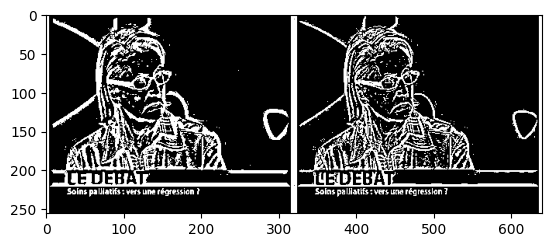

('‘Soins pallatis  vers une régression ?\n', '')

In [46]:
seuillagenorm = cv2.adaptiveThreshold(img_test_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
seuillagegaussien =  cv2.adaptiveThreshold(img_test_grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

result = np.hstack([seuillagenorm, seuillagegaussien])

plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(seuillagenorm, lang='fra')
text2 = pytesseract.image_to_string(seuillagegaussien, lang='fra')
text1,text2

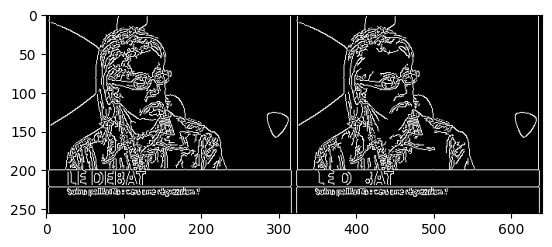

('', '(L\n\n‘ p OE\n')

In [47]:
edge = cv2.Canny(img_test_grey, 30, 150)
edge1 = cv2.Canny(img_test_grey, 70, 200)

result = np.hstack([edge, edge1])
plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(edge, lang='fra')
text2 = pytesseract.image_to_string(edge1, lang='fra')
text1,text2

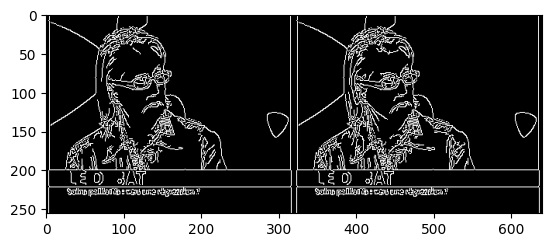

('pN ETE\n\n', '(L\n\n‘ p OE\n')

In [48]:
edge = imutils.auto_canny(img_test_grey)
edge1 = cv2.Canny(img_test_grey, 70, 200)

result = np.hstack([edge, edge1])
plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(edge, lang='fra')
text2 = pytesseract.image_to_string(edge1, lang='fra')
text1,text2

Extraction du bandeau uniquement

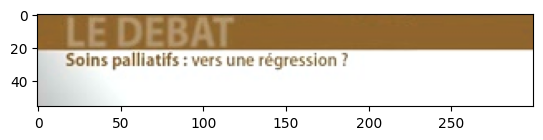

'Soins palliatifs: vers une régression\n'

In [49]:
bandeau = img_test[200:256, 10:310]
plt.imshow(bandeau)
plt.show()
text = pytesseract.image_to_string(bandeau, lang='fra')
text

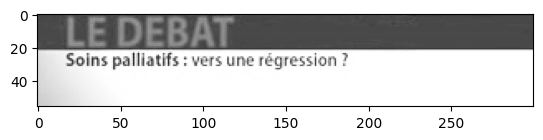

'Soins palliatifs: vers une régression\n'

In [50]:
bandeau_grey = cv2.cvtColor(bandeau, cv2.COLOR_RGB2GRAY)
plt.imshow(bandeau_grey, cmap = 'Greys_r')
plt.show()
text = pytesseract.image_to_string(bandeau_grey, lang='fra')
text

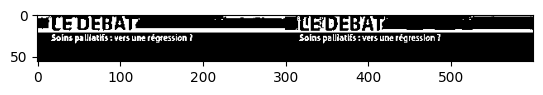

('‘Soins pallatis  vers une régression ?\n',
 'Solns paliatts :vers une régression ?\n')

In [51]:
seuillagenorm = cv2.adaptiveThreshold(bandeau_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
seuillagegaussien =  cv2.adaptiveThreshold(bandeau_grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

result = np.hstack([seuillagenorm, seuillagegaussien])

plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(seuillagenorm, lang='fra')
text2 = pytesseract.image_to_string(seuillagegaussien, lang='fra')
text1,text2

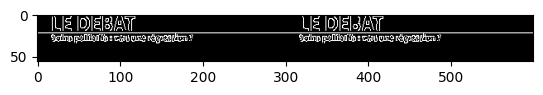

('UE IDIESANT\n\nSO sC OR REE T\n\n', 'E DIE|o/2 _\n\nes sc OR\n')

In [52]:
edge = cv2.Canny(bandeau_grey, 30, 150)
edge1 = cv2.Canny(bandeau_grey, 70, 200)

result = np.hstack([edge, edge1])
plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(edge, lang='fra')
text2 = pytesseract.image_to_string(edge1, lang='fra')
text1,text2

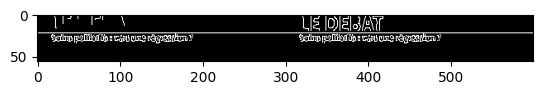

('\\F IT N\n\nsp\n', 'E DIE|o/2 _\n\nes sc OR\n')

In [53]:
edge = imutils.auto_canny(bandeau_grey)
edge1 = cv2.Canny(bandeau_grey, 70, 200)

result = np.hstack([edge, edge1])
plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(edge, lang='fra')
text2 = pytesseract.image_to_string(edge1, lang='fra')
text1,text2

Nombre de boites: 14


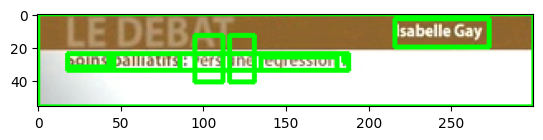

In [11]:
d = pytesseract.image_to_data(bandeau, output_type=Output.DICT)
 
NbBoites = len(d['level'])
print ("Nombre de boites: " + str(NbBoites))
for i in range(NbBoites):
    # Récupère les coordonnées de chaque boite
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    # Affiche un rectangle
    cv2.rectangle(bandeau, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.imshow(bandeau)
plt.show()

In [12]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
  
# thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
     
# erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)
# opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
# canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)
# skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
# template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Cms c




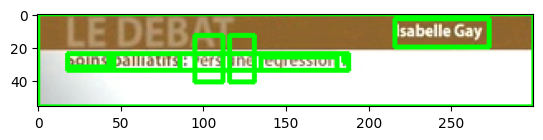

In [13]:
print(pytesseract.image_to_string(bandeau, lang='fra'))
plt.imshow(bandeau,'gray')

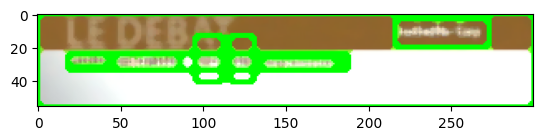

In [14]:
retouche3 = remove_noise(bandeau)
print(pytesseract.image_to_string(retouche3, lang='fra'))
plt.imshow(retouche3)

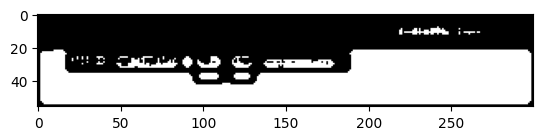

In [15]:
retouche4 = thresholding(grayscale(remove_noise(bandeau)))
print(pytesseract.image_to_string(retouche4, lang='fra'))
plt.imshow(retouche4,'gray')

### Analyse sur plusieurs images - Dossier images tests

In [5]:
folderPath_images_tests = "data\images_tests"
myRevList_images_tests = os.listdir(folderPath_images_tests)

In [11]:
corpus_images_tests = []
for images in myRevList_images_tests:
    img = cv2.imread(f'{folderPath_images_tests}/{images}')
    if img is None:
        corpus_images_tests.append("Could not read the image.")
    else:
        rev = pytesseract.image_to_string(img)
        corpus_images_tests.append(rev)
list(corpus_images_tests)
corpus_images_tests

['',
 'Soins palliatifs: vers une regression ?\n',
 '',
 '',
 '2 Isabelle Gay\n: Raphaél Theler\n‘Son: Yannick Bacher\nfees |\n\nGoretty Albasini\n\n© Canal 9 Novembre 2006\n',
 '']

Création d'un dataframe avec les textes identifiés pour chaque image :

In [12]:
data_images_tests = pd.DataFrame(list(corpus_images_tests), columns=['Review'])
data_images_tests

,Review
0,
1,Soins palliatifs: vers une regression ?\n
2,
3,
4,2 Isabelle Gay\n: Raphaél Theler\n‘Son: Yannic...
5,


In [13]:
#Nettoyage du texte
def clean(text):
    return re.sub('[^A-Za-z0-9" "]+', ' ', text)
data_images_tests['Cleaned Review'] = data_images_tests['Review'].apply(clean)
data_images_tests

,Review,Cleaned Review
0,,
1,Soins palliatifs: vers une regression ?\n,Soins palliatifs vers une regression
2,,
3,,
4,2 Isabelle Gay\n: Raphaél Theler\n‘Son: Yannic...,2 Isabelle Gay Rapha l Theler Son Yannick Ba...
5,,


### Analyse sur plusieurs images - Toutes les images

In [10]:
folderPath_images_global = "data\images"
myRevList_images_global = os.listdir(folderPath_images_global)

In [14]:
corpus_images_global = []
for images in myRevList_images_global:
    img = cv2.imread(f'{folderPath_images_global}/{images}')
    if img is None:
        corpus_images_global.append("Could not read the image.")
    else:
        rev = pytesseract.image_to_string(img)
        corpus_images_global.append(rev)
list(corpus_images_global)
corpus_images_global

['',
 '',
 '=\n\nMartigny - Sierre - Brig\n',
 'Soins pallatifs\n\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Soins pallatifs\n\n',
 '=\n\nMartigny - Sierre - Brig\n',
 '',
 '',
 '',
 '',
 '',
 'Soins pallatifs\n\n',
 'Soins pallatifs\n\n',
 'Soins pallatifs: vers une regression ?\n',
 'Soins pallatifs: vers une regression ?\n',
 'Solns pallatifs: ve\n\ntune regression ?\n',
 '=\n\nMartigny - Sierre - Brig\n',
 'Solns pallatifs: ve\n\ntune regression ?\n',
 'Soins pallatifs: ve\n\ntune regression ?\n',
 'LE DEBA\n\nSoins pallatifs: vers une regression ?\n',
 'Soins pallatifs: vers une regression ?\n',
 '',
 '~\nap |\n\n',
 'a\na)\n\n',
 '~\na)\n\n',
 'ae\n\n',
 '=\na |\n\n',
 '=\n\nMartigny - Sierre - Brig\n',
 ':\na |)\n\n',
 '',
 '“\n7)\n\n',
 '',
 '',
 'mm\noe\n\n',
 '',
 '',
 '',
 '',
 'Wianttigny ~Sienne~Biriigy\n',
 '—\n\n',
 '',
 'wg\n\n',
 '',
 '“3\n\n',
 '2\n\ne SF }\nb= aN\n\n',
 '',
 '',
 '',
 '',
 '+24\n\n-Siizamne ~ Bring\n',
 '',
 '',
 '',
 '2\n\n’\n\n4s\n\n',
 'F\n\nAs

Création d'un dataframe avec les textes identifiés pour chaque image :

In [15]:
data_images_global = pd.DataFrame(list(corpus_images_global), columns=['Review'])
data_images_global

,Review
0,
1,
2,=\n\nMartigny - Sierre - Brig\n
3,Soins pallatifs\n\n
4,
...,...
4697,Soins pallatifs\n\n
4698,
4699,
4700,


In [40]:
data_images_global['Cleaned_Review'] = data_images_global['Review'].apply(clean).fillna("")
data_images_global['Cleaned_Review'].str.strip().unique()
print(data_images_global['Cleaned_Review'].str.strip().value_counts(ascending=False).to_csv(sep="\t"))
# data_images_global

	Cleaned_Review
	3965
Soins pallatifs  vers une regression	130
LE DEBAT Soins pallatifs  vers une regression	40
Soins pallatifs	31
Soins paliaifs	23
a	18
soins a domicile	11
Soins pallatfs  vers une regression	10
LE DEBAT	10
Soins palliatifs  vers une regression	10
Solns pallatifs  vers une regression	10
LEDEBAT	9
bie	7
Soins pallatfs	7
be	7
ae	6
Soins pallatifs  ve	6
LE DEBAT Solns pallatifs  vers une regression	5
7 WAN	5
Soins pallatifs  vers une regress	5
LE DEBA Soins pallatifs  vers une regression	5
LE DEBA	4
bet	4
Solns paliaifs	4
Martigny   Sierre   Brig	4
de 40 foyers	4
a a	3
Soins paliatifs	3
3	3
Soins pallatifs  ve tune regression	3
Sols pallatifs  vers une regression	3
i	3
LE DEBAT Soins pallatfs  vers une regression	3
Solns paliaifs jersune regression	3
Soins paliaifs sune regression	2
Na	2
the	2
LE Soins pallatifs  vers une regression	2
ht	2
Soins paliaifs jersune regression	2
J	2
LE DEBAT Soins paliaifs	2
n	2
ey	2
bee	2
Soins pallatfs  vers une regressi	2
an	2
at	2
wg	2
Q

### Analyse sur plusieurs images - Toutes les images => que le bandeau